In [2]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Q1

In [3]:
# This is the function for the unit norm ball
# It takes p (Real Value) and X (Array containing values 0 <= x <= 1) as the 
# input and returns the Y values corresponding the input X values in the array.

def norm_ball(p, X):
      if p>0:
            m, = X.shape
            Y =  np.array([0]*m, dtype=float)
            for i in range(m):
                  Y[i] = (1 - X[i]**p)**(1/p)
            return Y
      else:
            print('Please enter a valid value for "p"!')
            return -1
      

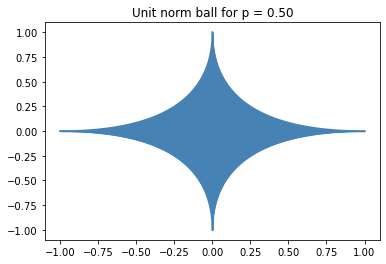

In [4]:
# This will give a plot for the unit norm ball with p < 1

p_conc = 0.5
X_ball = np.linspace(0, 1, 1000)
Y_ball = norm_ball(p_conc, X_ball)

for i in range(2):
      for j in range(2):
            plt.plot(((-1)**i)*X_ball, ((-1)**j)*Y_ball, color='steelblue')
            plt.fill_between(((-1)**i)*X_ball, ((-1)**j)*Y_ball, color='steelblue')

plt.title('Unit norm ball for p = %.2f'%p_conc)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

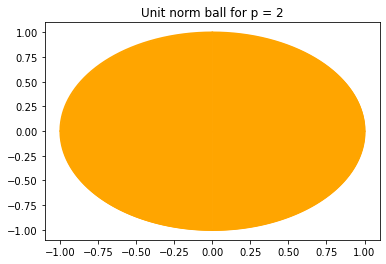

In [5]:
# This will give a plot for the unit norm ball with p >= 1
p_conv = 2
X_ball = np.linspace(0, 1, 1000)
Y_ball = norm_ball(p_conv, X_ball)

for i in range(2):
      for j in range(2):
            plt.plot(((-1)**i)*X_ball, ((-1)**j)*Y_ball, color='orange')
            plt.fill_between(((-1)**i)*X_ball, ((-1)**j)*Y_ball, color='orange')

plt.title('Unit norm ball for p = %d'%p_conv)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

### Observations for Q1:
From the plots we can verify that the unit norm ball plot for $0 < p < 1$ (steelblue plot for $p = 0.5$) is concave and the unit norm ball plot for $p >= 1$ (orange plot for $p = 2$) is convex.

# Q3

In [6]:
# the below function accepts an array X with dimensions (m,1) and outputs the entropy for that PMF

def entropy (X):
      m,  = np.shape(X)
      sum = 0
      for i in range(m):
            # formula for entropy
            
            if X[i] != 0:
                  sum += X[i]*np.log2(X[i]) 
      return -sum

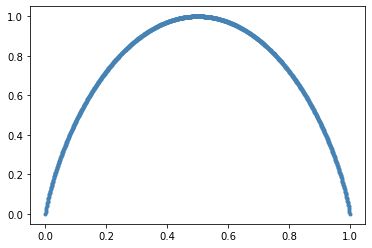

In [7]:
# number of values for bernoulli variable 
n = 1000
X_gen = np.linspace(0, 1, n)
X_gen = X_gen.reshape(n, 1)

# final array containing the bernoulli values
X_bern = np.hstack((X_gen, 1-X_gen))

# plotting X vs entropy of X
for i in range(n):
    plt.plot(X_bern[i][0], entropy(X_bern[i]), color="steelblue", marker=".")
    
plt.show()

# Q4

In [8]:
# this function takes a multidimensional numpy array representing an image and 
# returns a 2D array with intensity values and (their corresponding frequencies) / (total number of pixels). 
# i.e. it returns a normalised histogram of the image X

def normalised_histogram(X):
    m, n = np.shape(X)
    indices = np.arange(0, 256, dtype=int)
    hist = np.zeros(256)
    for i in range (m):
        for j in range(n):
            intensity = X[i][j]
            hist[intensity] += 1

    # obtaining a normalised histogram
    hist = np.vstack((indices, hist/(m*n)))
    return hist

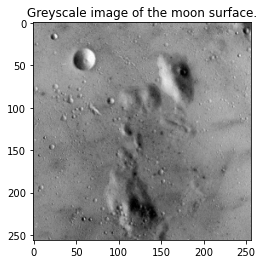

In [9]:
moon = mpimg.imread('moon.tiff')
plt.imshow(moon, cmap='gist_gray') # cmap='gist_gray' for greyscale image
plt.title('Greyscale image of the moon surface.')
plt.show()

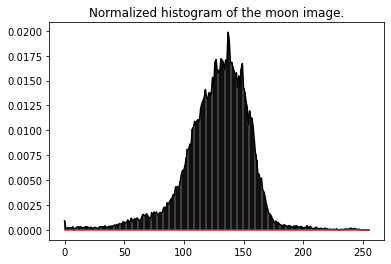

Entropy of the greyscale image of the moon surface is: 6.7093


In [10]:
histogram_moon = normalised_histogram(moon)

#normalised_histogram returns a 2D array with [0] having the intensity values and [1] having the normalised frequencies.
plt.stem(histogram_moon[0], histogram_moon[1], linefmt='k', markerfmt='k')
plt.title('Normalized histogram of the moon image.')
plt.show()

# calculating the entropy of the image using the defined function.
moon_entropy = entropy(histogram_moon[1])
print('Entropy of the greyscale image of the moon surface is: %.4f' % moon_entropy)

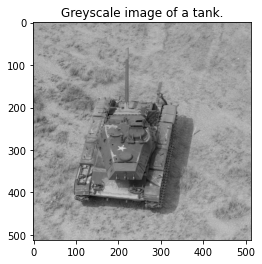

In [11]:
tank = mpimg.imread('tank.tiff')
plt.imshow(tank, cmap='gist_gray')
plt.title('Greyscale image of a tank.')
plt.show()

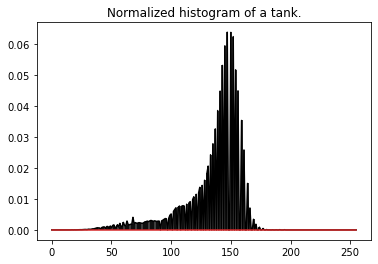

Entropy of the greyscale image of the tank is: 5.4957


In [12]:
histogram_tank = normalised_histogram(tank)
plt.stem(histogram_tank[0], histogram_tank[1], linefmt='k', markerfmt='k')
plt.title('Normalized histogram of a tank.')
plt.show()

tank_entropy = entropy(histogram_tank[1])
print('Entropy of the greyscale image of the tank is: %.4f' % tank_entropy)

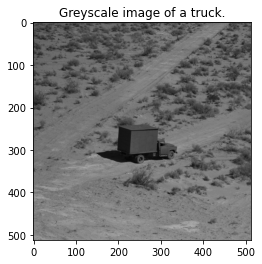

In [13]:
truck = mpimg.imread('truck.tiff')
plt.imshow(truck, cmap='gist_gray')
plt.title('Greyscale image of a truck.')
plt.show()

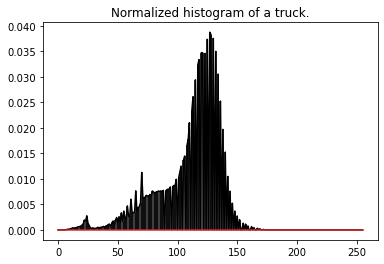

Entropy of the greyscale image of the truck is: 6.0274


In [14]:
histogram_truck = normalised_histogram(truck)
plt.stem(histogram_truck[0], histogram_truck[1], linefmt='k', markerfmt='k')
plt.title('Normalized histogram of a truck.')
plt.show()

truck_entropy = entropy(histogram_truck[1])
print('Entropy of the greyscale image of the truck is: %.4f' % truck_entropy)

# Q5

### (a)

In [15]:
def joint_histogram(X, Y):
    if np.shape(X) == np.shape(Y):
        hist = np.array([[0]*256]*256, dtype=int)
        m, n = np.shape(X)
        
        # updating the histogram matrix taking the intensity values of correspoding pixels as the indices.
        for i in range (m):
            for j in range (n):
                    hist[X[i,j], Y[i,j]] += 1
        return hist/(m*n)
    else:
        print('Error: Both the images are of different dimensions.')
        return -1


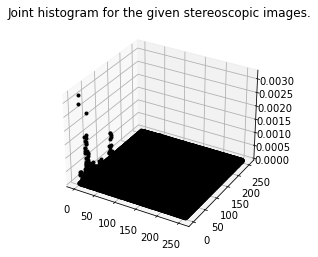

In [16]:
left_img = mpimg.imread('left.png')
right_img = mpimg.imread('right.png')

# scaling the intensities back t0 (0, 255) from (0, 1)
left_img = np.array(left_img*255, dtype=int)
right_img = np.array(right_img*255, dtype=int)

joint_hist = joint_histogram(left_img, right_img)

# plotting the joint histogram
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
plt.title('Joint histogram for the given stereoscopic images.')
for i in range(256):
    for j in range(256):
        ax.plot(i, j, joint_hist[i, j], marker='.', color='k')
plt.show()

### (b)

In [17]:
def joint_entropy(X):
    m, n = X.shape
    entropy = 0

    # formula for joint entropy
    for i in range(m):
        for j in range(n):
            if X[i,j] != 0:
                entropy += X[i, j]*np.log2(X[i, j])

    return -entropy


### (c)

In [18]:
print('Joint entropy of the joint histogram computed in Q5(a) is: %.3f' %joint_entropy(joint_hist))

Joint entropy of the joint histogram computed in Q5(a) is: 13.675


# Q6

### (a)

In [19]:
# this function takes in joint PMF and gives out conditional PMF according to the RV specified in index ('x', 'y') and its value.

def conditional_pmf(X, index, value):
    
    m, n = X.shape
    cond_x = np.zeros(m)
    cond_y = np.zeros(n).T
    if index=='x':
        cond_x = X[value][:]
        if np.all(cond_x) != 0:
            return cond_x/np.sum(cond_x)
        else:
            return cond_x
    if index=='y':
        X = X.T
        cond_y = X[:][value]
        if np.all(cond_y) != 0:
            return cond_y/np.sum(cond_y)
        else:
            return cond_y

### (b)

In [35]:
# this function takes the joint PMF and gives conditional entropy as per the index ('x' , 'y')

def conditional_entropy(X, index):
    m, n = X.shape

    if index=='x':
        cond_ent = 0

        # formula for conditional entropy
        for i in range(m):
            cond_pmf = conditional_pmf(X, index, i)
            for j in range(len(cond_pmf)):
                if (cond_pmf[j] != 0):
                    cond_ent += cond_pmf[j]*np.log2(cond_pmf[j]/np.sum(cond_pmf))
        return -cond_ent
    if index=='y':
        cond_ent = 0
        for i in range(n):
            cond_pmf = conditional_pmf(X, index, i)
            for j in range(len(cond_pmf)):
                if cond_pmf[j] != 0:
                    cond_ent += cond_pmf[j]*np.log2(cond_pmf[j]/np.sum(cond_pmf))
        return -cond_ent

### (c)

In [39]:
print('Conditional entropy H(Y|X): %.3f' %conditional_entropy(joint_hist, 'x'))
print('Conditional entropy H(X|Y): %.3f' %conditional_entropy(joint_hist, 'y'))

Conditional entropy H(Y|X): 6.417
Conditional entropy H(X|Y): 6.397


# Q7

### (a)

In [117]:
# relative_entropy(p, q) gives D(p||q)

def relative_entropy(X, Y):
    if X.shape==Y.shape:
        rel_ent = 0
        m, = X.shape

        # formula for relative entropy or KL-Divergence
        for i in range(m):
            if Y[i] > 0 and Y[i] < 1:
                rel_ent += X[i] * np.log2(X[i]/Y[i]) 
        return rel_ent

In [108]:
r = np.array([0.2, 0.8])

# generating the bernoulli random variable similar to Q1
q = np.linspace(0, 1, 1000)
q = q.reshape(1000, 1)
q = np.hstack((q, 1-q))


(i)

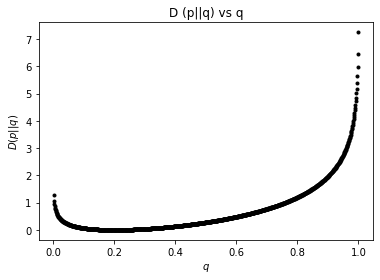

In [111]:
# changed the range and the index to avoid q=0 and q=1

for i in range(len(q)-2):
    plt.plot(q[i+1][0], relative_entropy(r, q[i+1]), marker='.', color='k')
plt.title('D (p||q) vs q')
plt.ylabel('$D(p||q)$')
plt.xlabel('$q$')
plt.show()

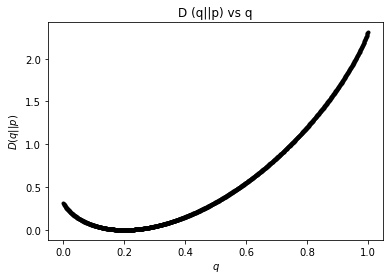

In [99]:
for i in range(len(q)-2):
    plt.plot(q[i+1][0], relative_entropy(q[i+1],r[0]), marker='.', color='k')
plt.title('D (q||p) vs q')
plt.ylabel('$D(q||p)$')
plt.xlabel('$q$')
plt.show()

(ii)

As seen from the above plots, neither $D(p||q)$ nor $D(q||p)$ go beyond the positive x region and touch the x-axis at $x=r$.    
Hence, $D(p||q) , D(q||p) > 0$

(iii)

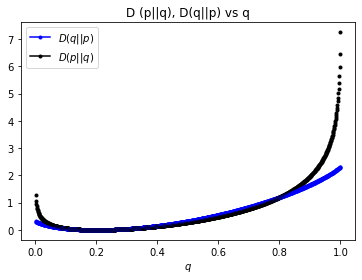

In [100]:
# plotting the first point separately for labelling reasons

plt.plot(q[1][0], relative_entropy(q[1], r), marker='.', color='b', label='$D(q||p)$')
plt.plot(q[1][0], relative_entropy(r, q[1]), marker='.', color='k', label='$D(p||q)$')
for i in range(1, len(q)-2):
    plt.plot(q[i+1][0], relative_entropy(q[i+1],r), marker='.', color='b')
    plt.plot(q[i+1][0], relative_entropy(r, q[i+1]), marker='.', color='k')
plt.title('D (p||q), D(q||p) vs q')
plt.legend()
plt.xlabel('$q$')
plt.show()

From the above graph, it is clear that $D(p||q) \neq D(q||p)$ and $D(p||q) = D(q||p) = 0$ at $r = s$

(iv)

In [121]:
left_hist = normalised_histogram(left_img)
right_hist = normalised_histogram(right_img)

# considering the second column of the normalised histogram as the 1st column contains the intensities.

print('D(left_hist || right_hist):', relative_entropy(left_hist[1], right_hist[1]))
print('D(right_hist || left_hist):', relative_entropy(right_hist[1], left_hist[1]))

D(left_hist || right_hist): 0.015104015237387055
D(right_hist || left_hist): 0.014409785833354494


The low values indicate that the images have less changes relative to one another. Hence, relative entropy ot KL-divergence may be a suitable metric to find image similarity.